In [617]:
#Import all libraries as req for this model designing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier #For Random Forest model
import seaborn as sns # For grapths
from sklearn.model_selection import train_test_split # For spliting the dataset
from sklearn.metrics import accuracy_score 
from sklearn import linear_model # For linear regression
from sklearn import tree #For decision tree model
%matplotlib inline

In [618]:
os.getcwd() # To get the current working directory

'C:\\Users\\pdas\\Desktop\\TDS\\Personal\\EdWisr\\Bike Rental'

In [619]:
bike = pd.read_csv('day.csv') # Data loading

In [620]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [621]:
bike.shape # To get the shape of Data

(731, 16)

In [622]:
bike.columns # Get columns of data set

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Insert Distribution plot for all variables

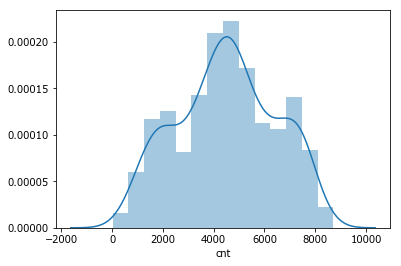

In [623]:
sns.distplot(bike.cnt) 

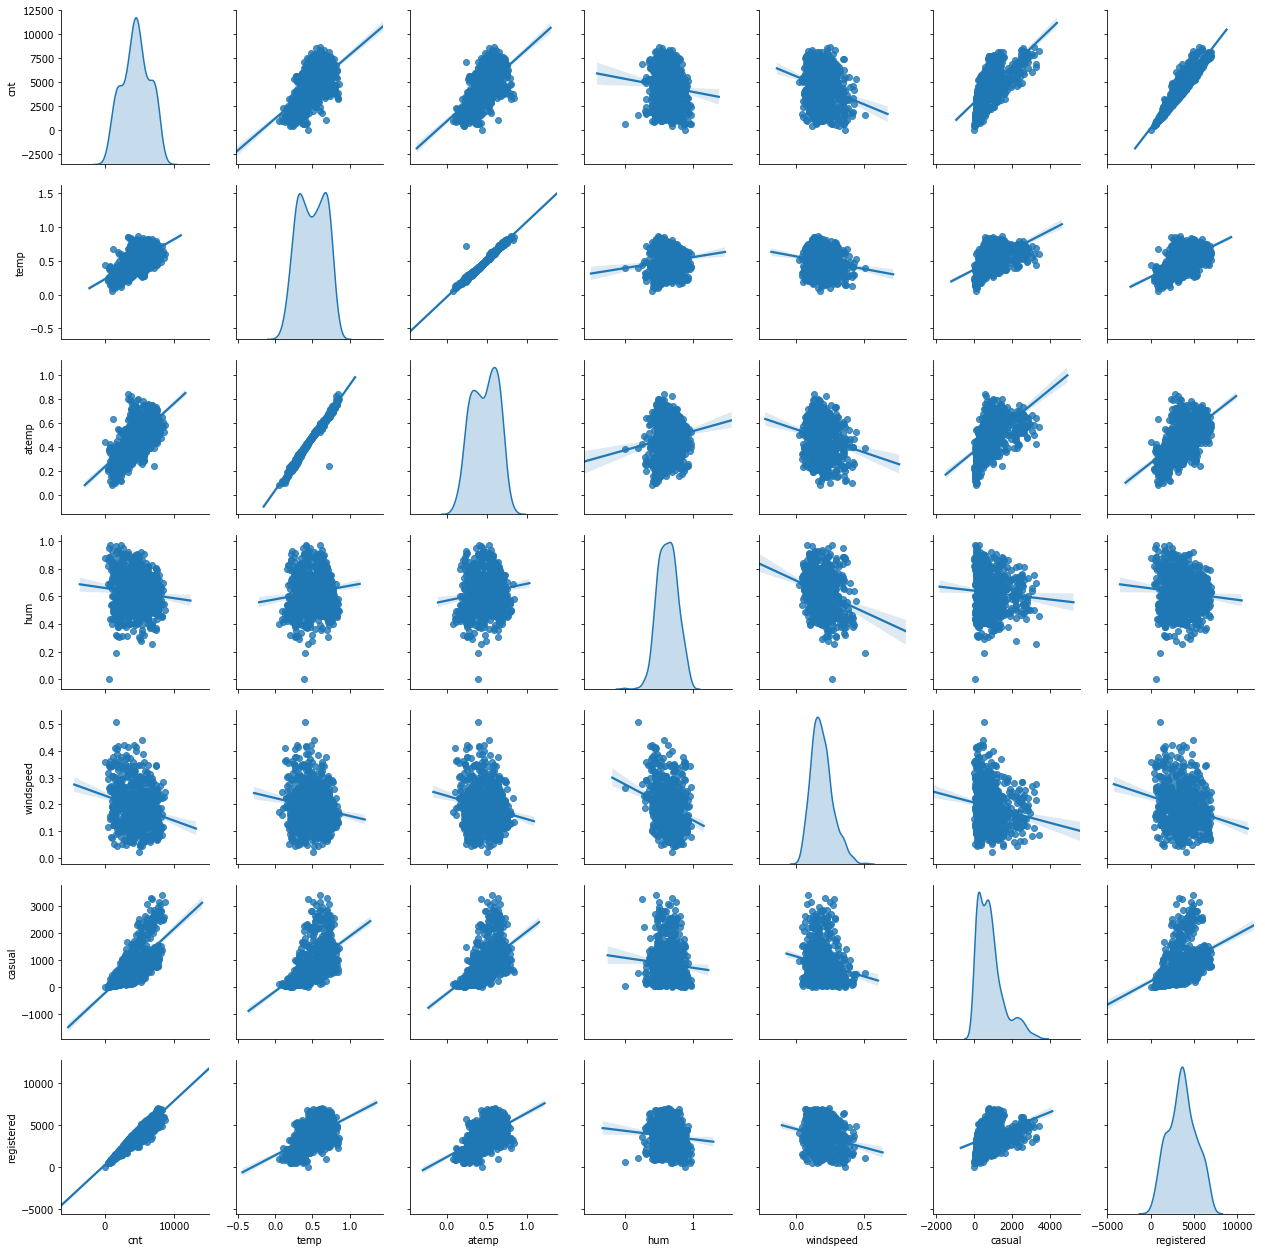

In [659]:
# Karnel density estimation (KDE) and regression trial with each variables.
sns.pairplot(bike,vars = ["cnt",'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'] ,diag_kind= "kde",kind = "reg")

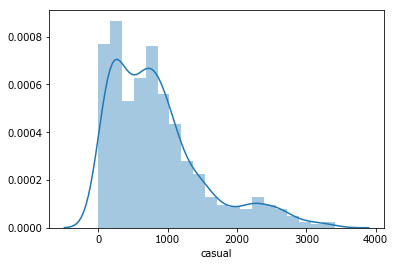

In [625]:
sns.distplot(bike.casual) # This 'Casual' variable has outliers.

In [626]:
print("Skewness: %f" % bike['cnt'].skew()) #Check skewness of the target variable

Skewness: -0.047353


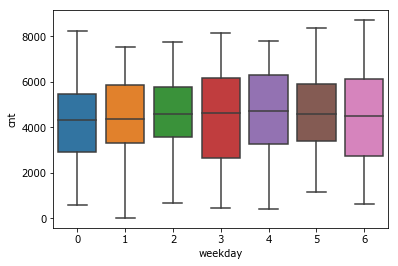

In [627]:
sns.boxplot(x="weekday",y="cnt",data = bike)

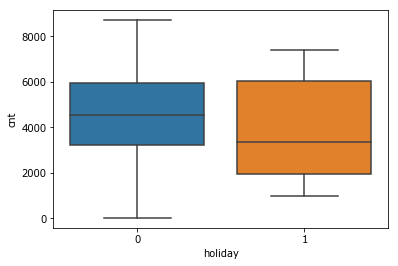

In [628]:
sns.boxplot(x="holiday",y = "cnt",data = bike)

In [629]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


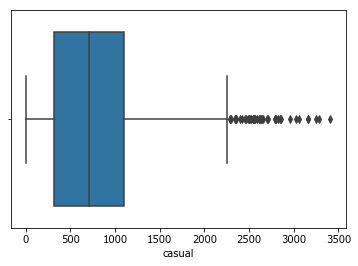

In [630]:
sns.boxplot(x="casual",data =bike) # Lot of outliers [Before Outlier removal]

Correlation before removal of outlier: 0.672804


(731,)

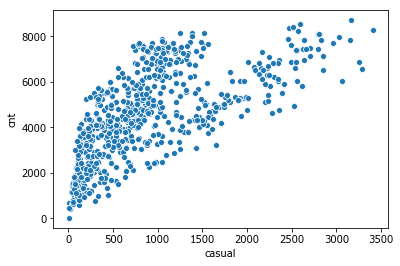

In [631]:
sns.scatterplot(x="casual",y="cnt",data =bike_1)
print ("Correlation before removal of outlier: %f" % bike_1.casual.corr(bike_1.cnt))
bike_1['casual'].shape

In [632]:

cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(bike.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

bike_out = bike.copy()

bike_out = bike_out.drop(bike_out[bike_out.loc[:,i] < min].index)
bike_out = bike_out.drop(bike_out[bike_out.loc[:,'casual'] > max].index)


In [633]:
bike_out.shape

(687, 16)

In [634]:
bike_out.casual.corr(bike_out.cnt)

0.6460020508747333

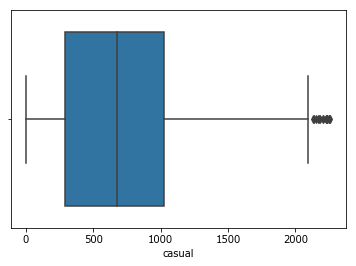

In [635]:
sns.boxplot(x="casual",data = bike_out) # After outlier removal

# Decision Tree Regressor

In [636]:
# Design of first model for Decision Tree Regressor
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [637]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [638]:
data1 =['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

data1 = bike[data1]

In [639]:
corr =data1.corr() #Finding correlation between numeric variables

corr.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1,-0.248489,-0.0770079,-0.0910886,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.0770079,-0.167613,1,0.395282,0.672804
registered,0.540012,0.544192,-0.0910886,-0.217449,0.395282,1,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1


In [640]:
# Feature and target selection

features = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

X= bike[features]

y= bike.cnt

In [641]:
#Data spliting

train_X,test_X,train_y,test_y =train_test_split(X,y,random_state =1)

In [642]:
#Decision tree model

first_model = tree.DecisionTreeRegressor(random_state =1)
first_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [643]:
first_pred = first_model.predict(test_X)

In [644]:
#Custom function to calculate MAPE

def MAPE(y_test,y_predict):
    mape = np.mean(np.abs(test_y-y_predict)/test_y)*100
    print("Mean absolute percentage error is: ",round(mape,2),"%")
    return mape

In [645]:
#Custom function to calculate RMSE

def RMSE(test_y,y_predict):
    mse = np.mean((test_y-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

In [646]:
# MAPE and RMSE score is very less which implies it's good model

MAPE(test_y,first_pred)
RMSE(test_y,first_pred)

Mean absolute percentage error is:  1.26 %
Mean Square :  2474.3224043715845
Root Mean Square :  49.74256129685708


49.74256129685708

# Random Forest Regressor

In [651]:
from sklearn.ensemble import RandomForestRegressor

In [652]:
third_model = RandomForestRegressor(n_estimators= 500,random_state =1)
third_model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [653]:
third_pred = third_model.predict(test_X)

In [654]:
# MAPE ADN RMSE score are good as compare to previous model

MAPE(test_y,third_pred)
RMSE(test_y,third_pred)

Mean absolute percentage error is:  0.63 %
Mean Square :  570.372239431694
Root Mean Square :  23.882467197333153


23.882467197333153

# Linear Model Regression

In [655]:
forth_model = linear_model.LinearRegression()
forth_model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [656]:
forth_pred = forth_model.predict(test_X)

In [657]:
# The score of MAPE AND RMSE are veru good and list as mopare to above two models.

MAPE(test_y,forth_pred)
RMSE(test_y,forth_pred)

Mean absolute percentage error is:  0.0 %
Mean Square :  4.4508984121492315e-25
Root Mean Square :  6.671505386454568e-13


6.671505386454568e-13

In [658]:
new_bike = pd.DataFrame({'Predict': forth_pred,'Test':test_y})
new_bike.head()

,Predict,Test
404,3830.0,3830
726,2114.0,2114
159,3915.0,3915
422,4322.0,4322
512,6591.0,6591


# Linear Model Regression is the best model for bike count prediction.